In [10]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("윈저라이징_inf제거.csv",index_col = 0)
df = df.drop(columns = ['코스닥연수익률 (%)', '코스피연수익률(%)','코스닥변동성', '코스피변동성'])
X_data = df.drop(columns=['회사명', '거래소코드', '회계년도', '부실'])
y_data = df['부실']
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3,stratify=y_data,random_state = 42)

In [14]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우의 경우

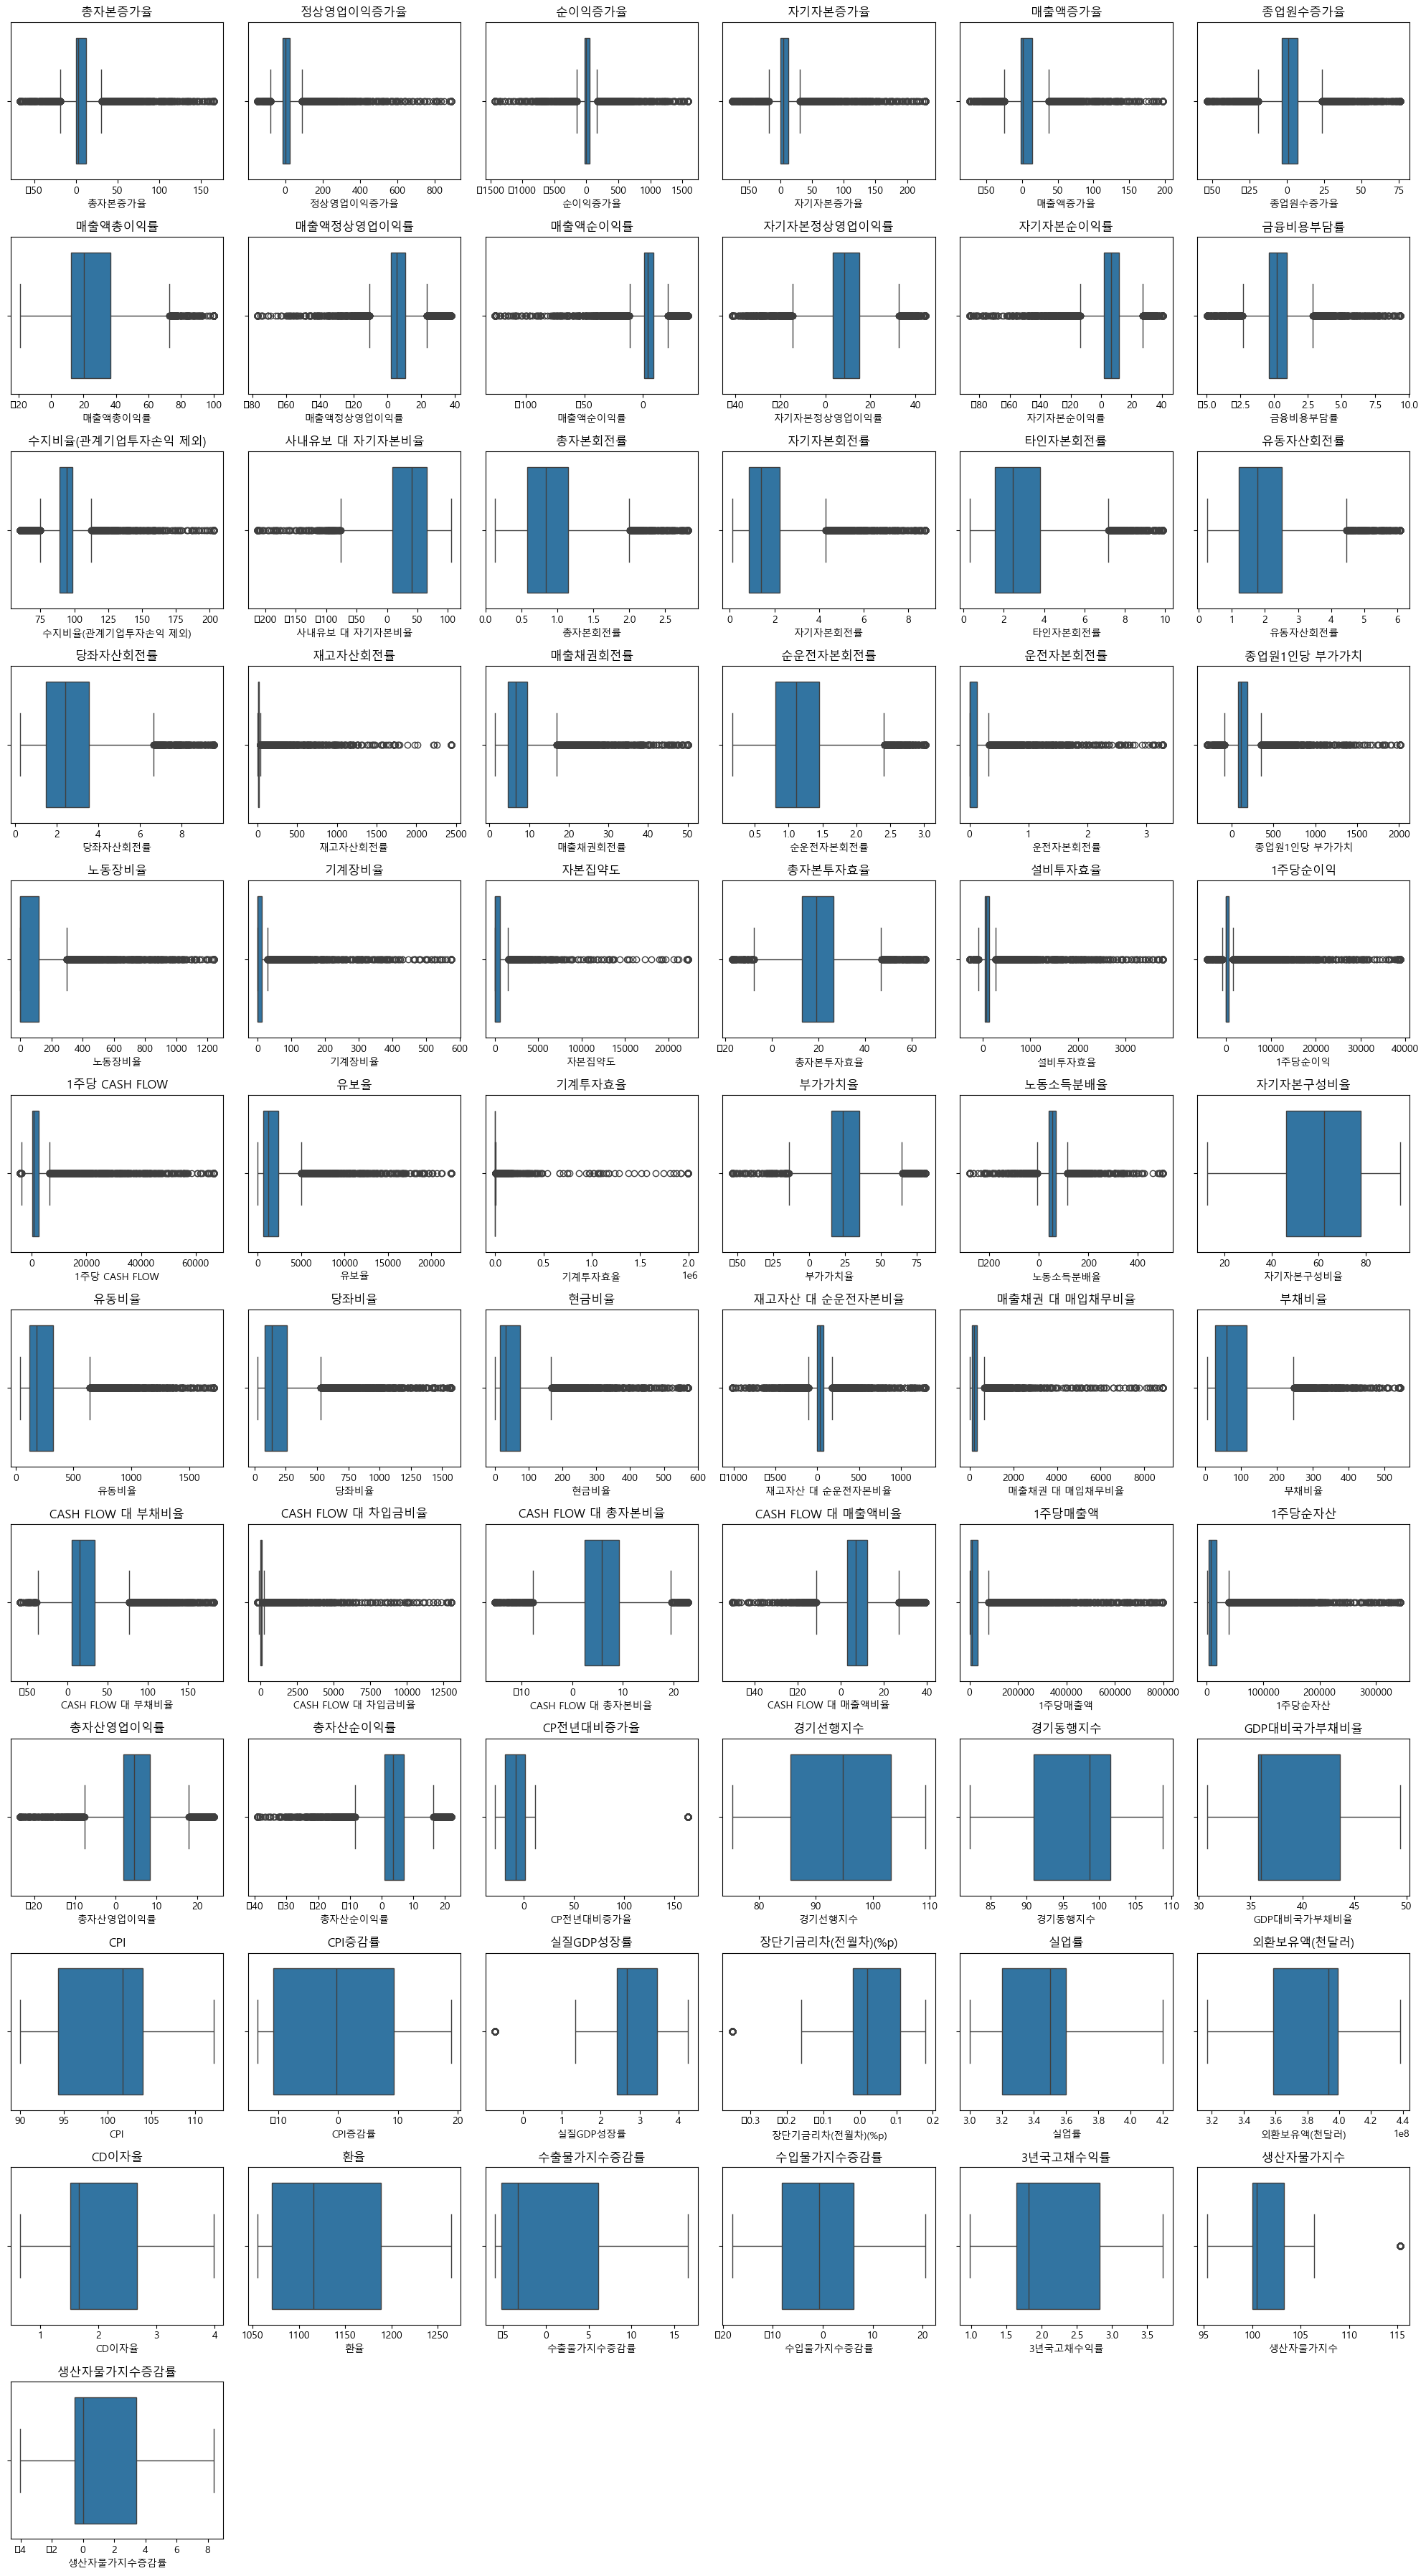

In [20]:
# 숫자형 데이터만 선택
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# 서브플롯 생성
num_plots = len(numeric_cols)
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols  # num_plots를 num_cols로 나눈 후 올림
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3))

# 각 플롯에 박스플롯 그리기
for i, col in enumerate(numeric_cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(x=X_train[col], ax=ax)
    ax.set_title(col, rotation=0)  # 세로로 제목을 회전

# 빈 서브플롯 제거
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

# 서브플롯 간격 조정
plt.subplots_adjust(hspace=0.1)  # 서브플롯 간의 세로 간격 설정

plt.tight_layout()
plt.show()


In [31]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train_scaled

,총자본증가율,정상영업이익증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,매출액총이익률,매출액정상영업이익률,매출액순이익률,자기자본정상영업이익률,...,장단기금리차(전월차)(%p),실업률,외환보유액(천달러),CD이자율,환율,수출물가지수증감률,수입물가지수증감률,3년국고채수익률,생산자물가지수,생산자물가지수증감률
0,-0.327974,-0.448681,-0.076538,-0.301429,-0.266699,-0.683206,1.043401,0.302295,0.344700,-0.411069,...,0.363169,-0.792737,-1.266035,0.696794,-1.262626,-0.705949,-0.803847,0.958065,-0.116204,-0.848399
1,-0.327974,-0.773196,-0.076538,-0.301429,-0.266699,-0.290735,-0.800093,-0.029637,0.092735,-0.450263,...,1.313307,-0.162217,-0.549865,-0.541360,1.037042,-0.585936,-0.488458,-0.587486,-1.282907,-0.907912
2,0.052346,-0.295217,-0.136572,-0.212512,0.157461,-0.083427,-0.063644,0.249572,0.114510,0.532803,...,1.313307,-0.162217,-0.549865,-0.541360,1.037042,-0.585936,-0.488458,-0.587486,-1.282907,-0.907912
3,0.012853,-0.209895,5.364087,0.631307,4.221745,-1.434314,-0.500540,0.054275,0.115547,1.714243,...,-0.044033,-0.162217,1.556202,-0.791163,0.751660,1.586930,1.255876,-0.384791,0.749651,1.347692
4,-0.218555,-0.614032,-0.118914,-0.192040,-1.200624,0.003311,0.789827,1.152546,0.762568,0.152055,...,-0.994171,0.468303,0.319608,-0.096059,-0.352120,-0.086220,0.438100,-0.360721,-0.341840,0.107927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,-0.288782,-0.442982,0.069750,-0.291729,0.242324,-0.435912,0.069012,-0.118746,0.166355,-0.519054,...,-2.283644,-1.423257,0.476580,2.130447,1.894699,1.877503,1.758222,2.052619,2.384135,1.897087
8621,0.136085,-0.230900,-0.177427,-0.038351,-0.179523,0.043296,0.332550,1.049328,0.461869,0.643988,...,-0.044033,0.468303,-0.772543,0.121161,-0.599754,-0.915173,-0.826258,-0.004737,-0.215264,-0.554944
8622,-0.194506,-0.349520,-0.123603,-0.024324,-0.291557,0.499744,0.345675,0.403286,0.343145,0.635989,...,0.295302,2.359862,1.330745,-1.475407,-0.796049,-0.821578,-0.946185,-1.426137,-0.420721,-0.534768
8623,0.210493,0.322957,0.045599,0.010818,0.491125,0.205698,0.054474,1.113932,0.711760,0.607193,...,-2.283644,-1.423257,0.476580,2.130447,1.894699,1.877503,1.758222,2.052619,2.384135,1.897087


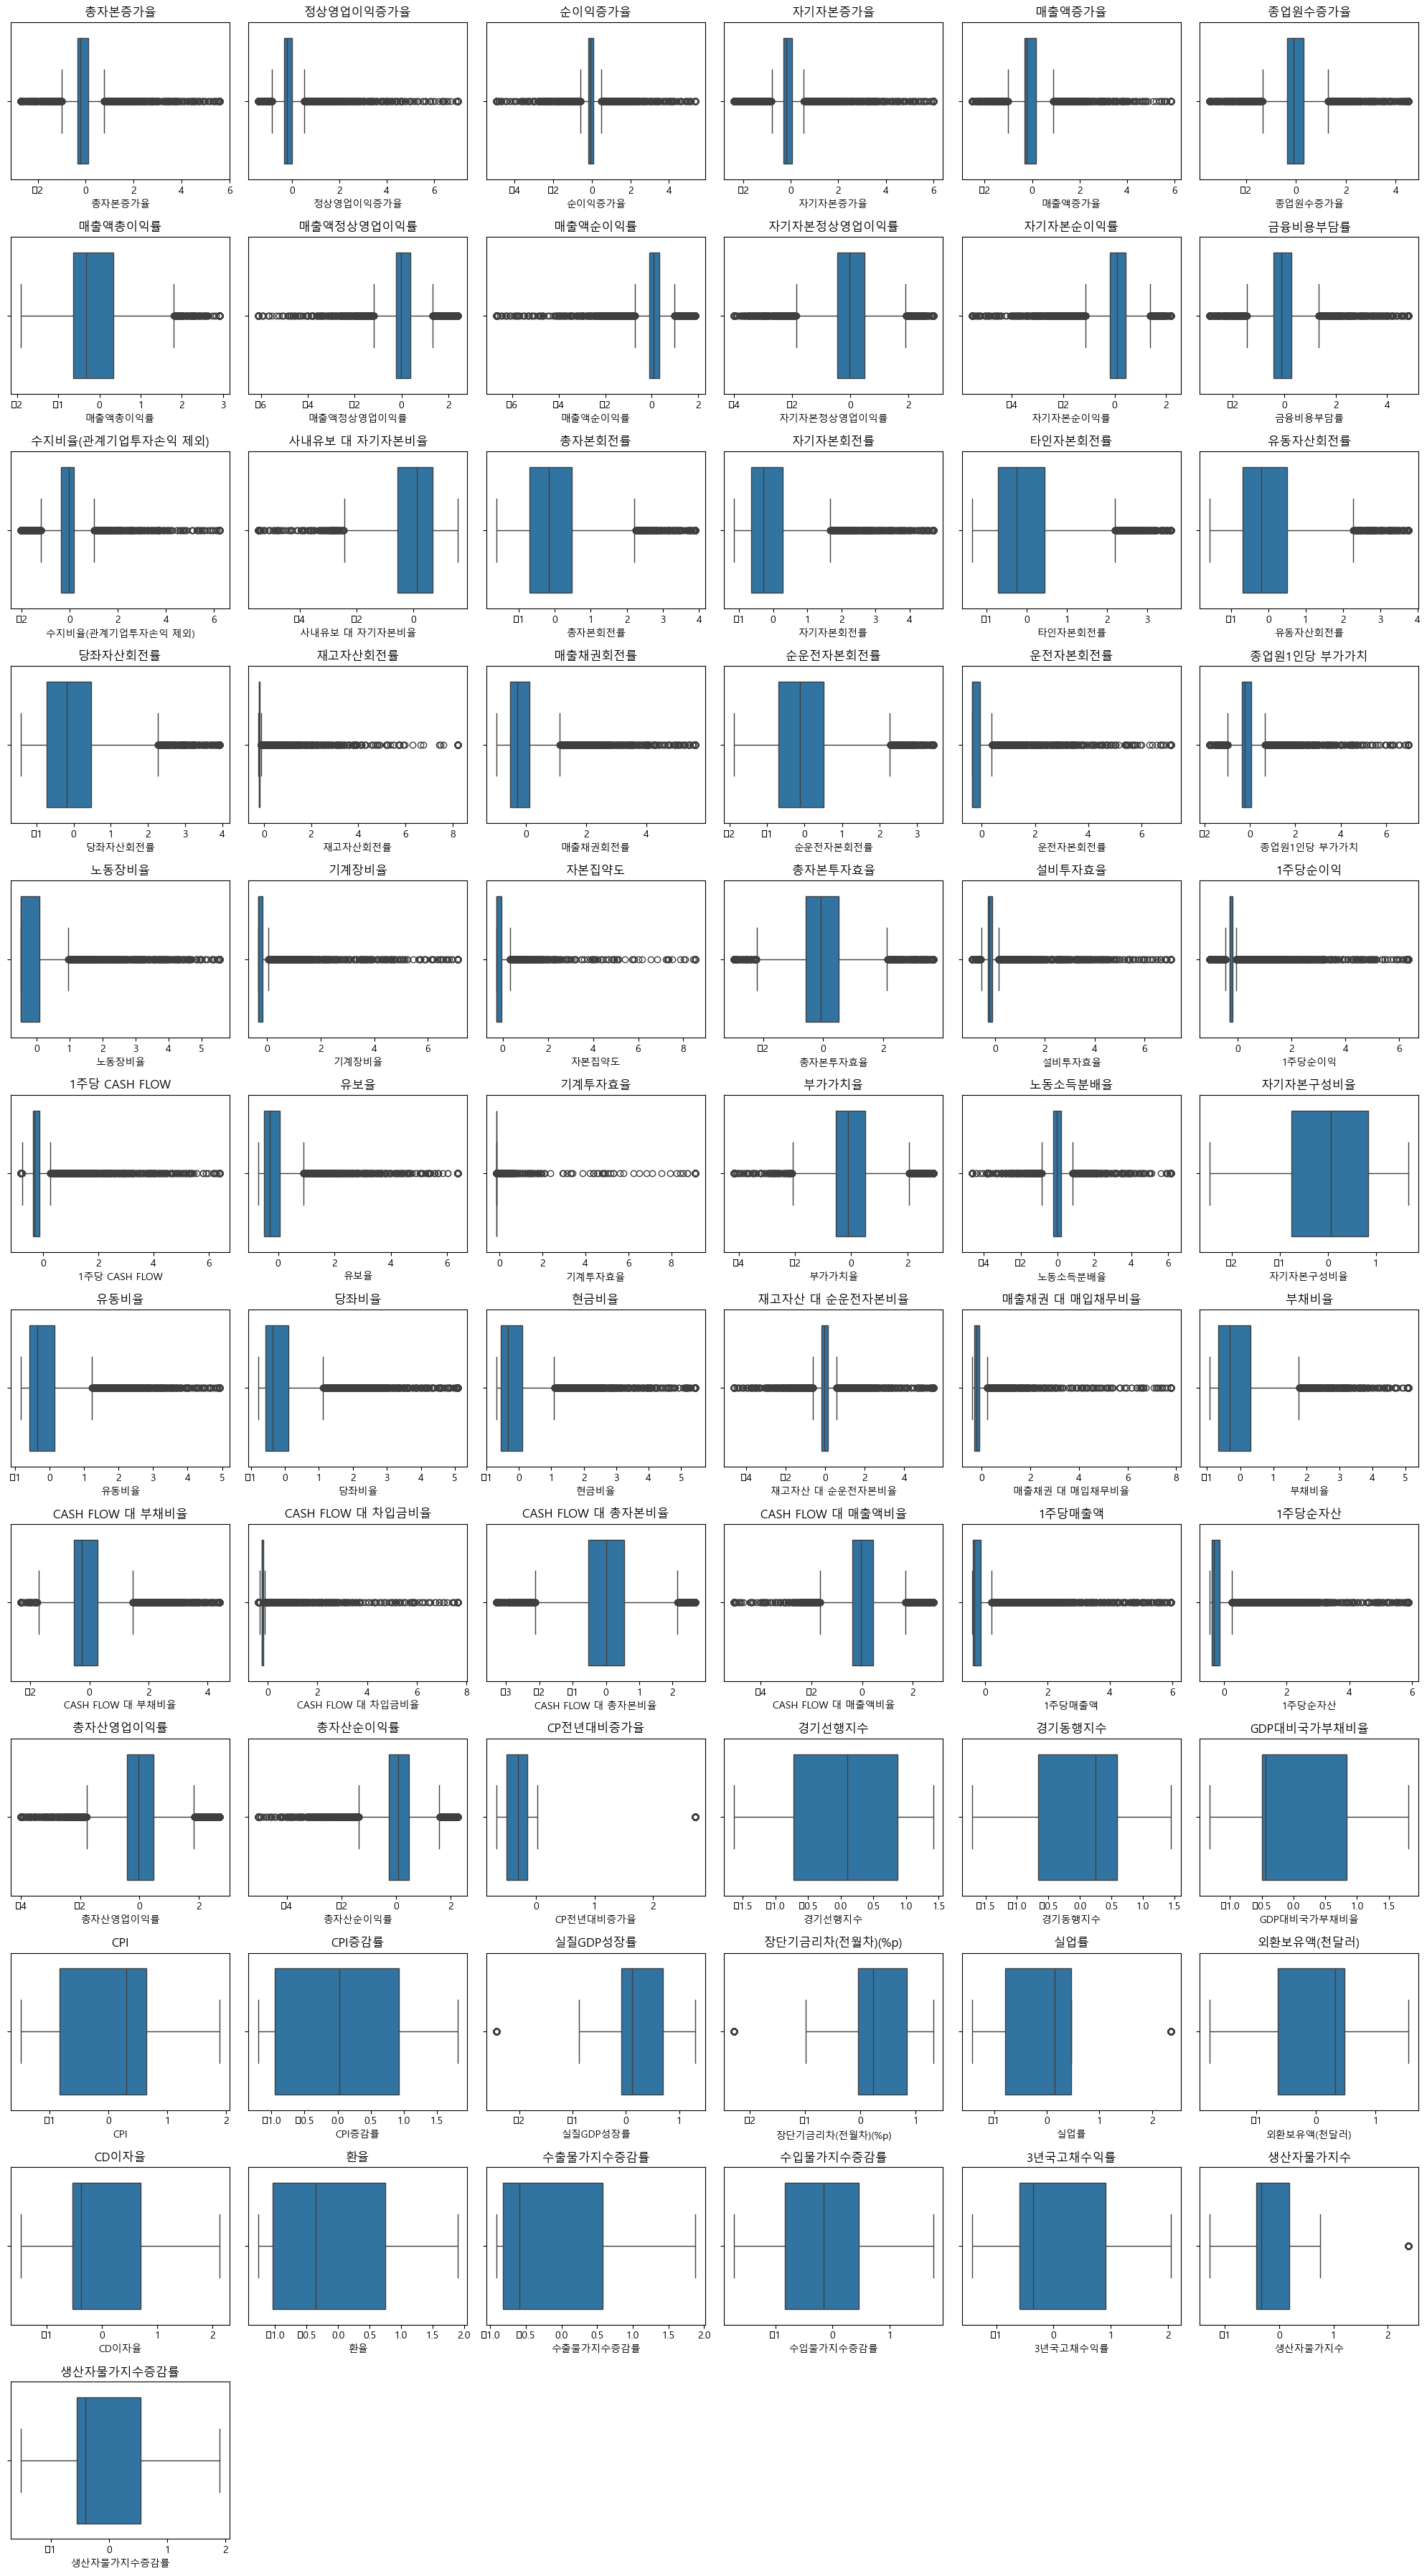

In [33]:
# 숫자형 데이터만 선택
numeric_cols = X_train_scaled.columns

# 서브플롯 생성
num_plots = len(numeric_cols)
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols  # num_plots를 num_cols로 나눈 후 올림
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3))

# 각 플롯에 박스플롯 그리기
for i, col in enumerate(numeric_cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(x=X_train_scaled[col], ax=ax)
    ax.set_title(col, rotation=0)  # 세로로 제목을 회전

# 빈 서브플롯 제거
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

# 서브플롯 간격 조정
plt.subplots_adjust(hspace=0.1)  # 서브플롯 간의 세로 간격 설정

plt.tight_layout()
plt.show()


In [35]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train_scaled

,총자본증가율,정상영업이익증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,매출액총이익률,매출액정상영업이익률,매출액순이익률,자기자본정상영업이익률,...,장단기금리차(전월차)(%p),실업률,외환보유액(천달러),CD이자율,환율,수출물가지수증감률,수입물가지수증감률,3년국고채수익률,생산자물가지수,생산자물가지수증감률
0,-0.239659,-0.705557,0.000000,-0.315477,-0.106642,-0.900376,1.389078,0.487515,0.609697,-0.407282,...,0.153846,-0.75,-1.423295,0.868421,-0.510152,-0.085605,-0.502932,0.880711,0.362538,-0.409521
1,-0.239659,-1.664421,0.000000,-0.315477,-0.106642,-0.300752,-0.492790,-0.043995,0.020606,-0.448772,...,1.230769,-0.25,-0.780451,-0.131579,0.778342,0.000000,-0.257706,-0.151438,-1.558912,-0.463934
2,0.624479,-0.252105,-0.220284,-0.054113,0.782459,0.015977,0.258988,0.403092,0.071515,0.591871,...,1.230769,-0.25,-0.780451,-0.131579,0.778342,0.000000,-0.257706,-0.151438,-1.558912,-0.463934
3,0.534745,0.000000,19.963455,2.426200,9.301791,-2.047932,-0.187002,0.090369,0.073939,1.842506,...,-0.307692,-0.25,1.109984,-0.333333,0.618443,1.549909,1.098580,-0.016074,1.788520,1.598343
4,0.008957,-1.194130,-0.155491,0.006060,-2.064286,0.148496,1.130226,1.848989,1.586667,0.188823,...,-1.384615,0.25,0.000000,0.228070,0.000000,0.356448,0.462729,0.000000,-0.009063,0.464838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,-0.150609,-0.688718,0.536780,-0.286964,0.960345,-0.522556,0.394406,-0.186683,0.192727,-0.521592,...,-2.846154,-1.25,0.140900,2.026316,1.258883,1.757175,1.489173,1.611675,4.480363,2.100649
8621,0.814744,-0.062064,-0.370194,0.457813,0.076091,0.209586,0.663430,1.683710,0.883636,0.709568,...,-0.307692,0.25,-0.980330,0.403509,-0.138748,-0.234845,-0.520357,0.237733,0.199396,-0.141219
8622,0.063598,-0.412557,-0.172695,0.499043,-0.158749,0.906955,0.676828,0.649227,0.606061,0.701101,...,0.076923,1.75,0.907611,-0.885965,-0.248731,-0.168084,-0.613605,-0.711506,-0.138973,-0.122772
8623,0.983808,1.574453,0.448161,0.602339,1.481868,0.457707,0.379565,1.787158,1.467879,0.670618,...,-2.846154,-1.25,0.140900,2.026316,1.258883,1.757175,1.489173,1.611675,4.480363,2.100649


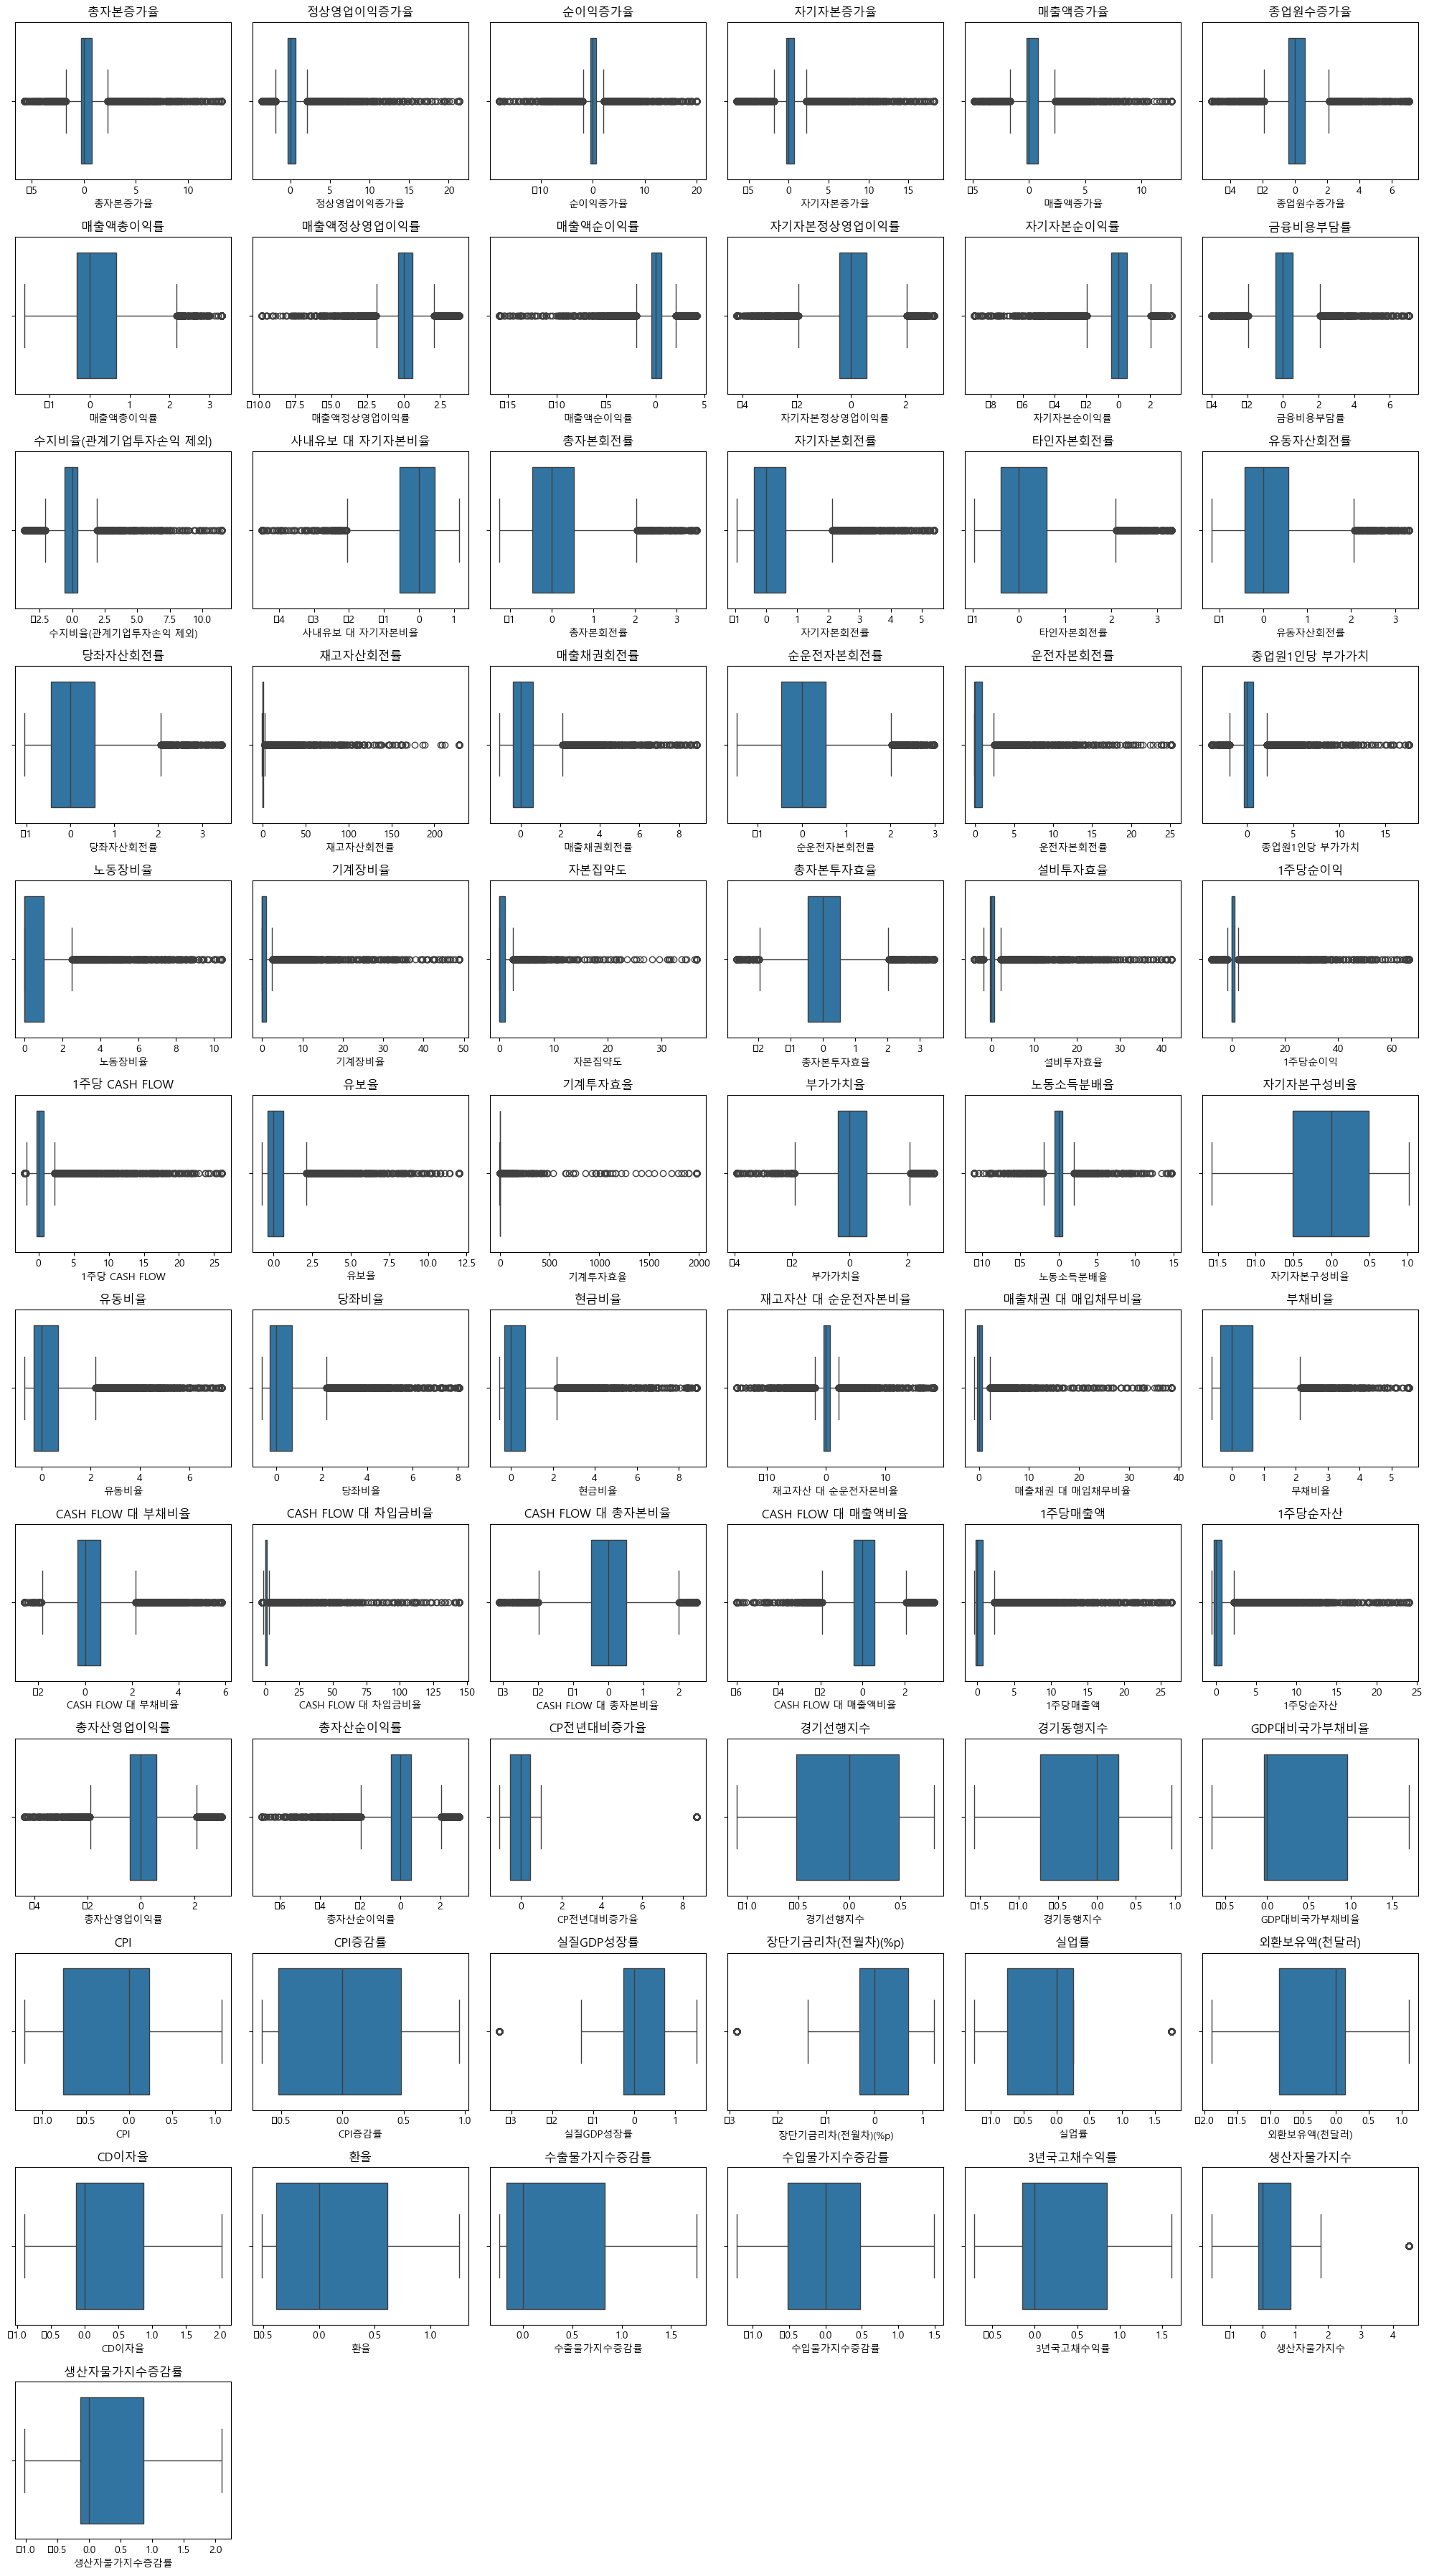

In [36]:
# 숫자형 데이터만 선택
numeric_cols = X_train_scaled.columns

# 서브플롯 생성
num_plots = len(numeric_cols)
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols  # num_plots를 num_cols로 나눈 후 올림
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3))

# 각 플롯에 박스플롯 그리기
for i, col in enumerate(numeric_cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(x=X_train_scaled[col], ax=ax)
    ax.set_title(col, rotation=0)  # 세로로 제목을 회전

# 빈 서브플롯 제거
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

# 서브플롯 간격 조정
plt.subplots_adjust(hspace=0.1)  # 서브플롯 간의 세로 간격 설정

plt.tight_layout()
plt.show()


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_train_scaled

,총자본증가율,정상영업이익증가율,순이익증가율,자기자본증가율,매출액증가율,종업원수증가율,매출액총이익률,매출액정상영업이익률,매출액순이익률,자기자본정상영업이익률,...,장단기금리차(전월차)(%p),실업률,외환보유액(천달러),CD이자율,환율,수출물가지수증감률,수입물가지수증감률,3년국고채수익률,생산자물가지수,생산자물가지수증감률
0,0.287463,0.114282,0.472542,0.249429,0.271096,0.347565,0.611920,0.754293,0.821748,0.523583,...,0.735849,0.166667,0.154418,0.602410,0.000000,0.074919,0.263544,0.685361,0.318159,0.195139
1,0.287463,0.075694,0.472542,0.249429,0.271096,0.396771,0.230014,0.715209,0.792276,0.517874,...,1.000000,0.333333,0.368993,0.259036,0.728360,0.117893,0.354201,0.241078,0.000000,0.177692
2,0.333220,0.132531,0.466722,0.260038,0.321748,0.422761,0.382580,0.748085,0.794823,0.661076,...,1.000000,0.333333,0.368993,0.259036,0.728360,0.117893,0.354201,0.241078,0.000000,0.177692
3,0.328469,0.142676,1.000000,0.360715,0.807091,0.253397,0.292071,0.725089,0.794944,0.833175,...,0.622642,0.333333,1.000000,0.189759,0.637972,0.895952,0.855603,0.299345,0.554277,0.838940
4,0.300628,0.094620,0.468433,0.262481,0.159570,0.433636,0.559388,0.854408,0.870626,0.605613,...,0.358491,0.500000,0.629499,0.382530,0.288379,0.296831,0.620537,0.306264,0.256628,0.475493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8620,0.292178,0.114960,0.486724,0.250587,0.331882,0.378569,0.410061,0.704716,0.800887,0.507853,...,0.000000,0.000000,0.676530,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8621,0.343295,0.140179,0.462761,0.280817,0.281506,0.438649,0.464657,0.842254,0.835453,0.677272,...,0.622642,0.500000,0.302275,0.442771,0.209947,0.000000,0.257102,0.408594,0.291146,0.281167
8622,0.303521,0.126074,0.467979,0.282491,0.268128,0.495875,0.467376,0.766184,0.821566,0.676107,...,0.716981,1.000000,0.932450,0.000000,0.147776,0.033514,0.222630,0.000000,0.235118,0.287082
8623,0.352247,0.206039,0.484383,0.286684,0.361593,0.459010,0.407050,0.849861,0.864683,0.671912,...,0.000000,0.000000,0.676530,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


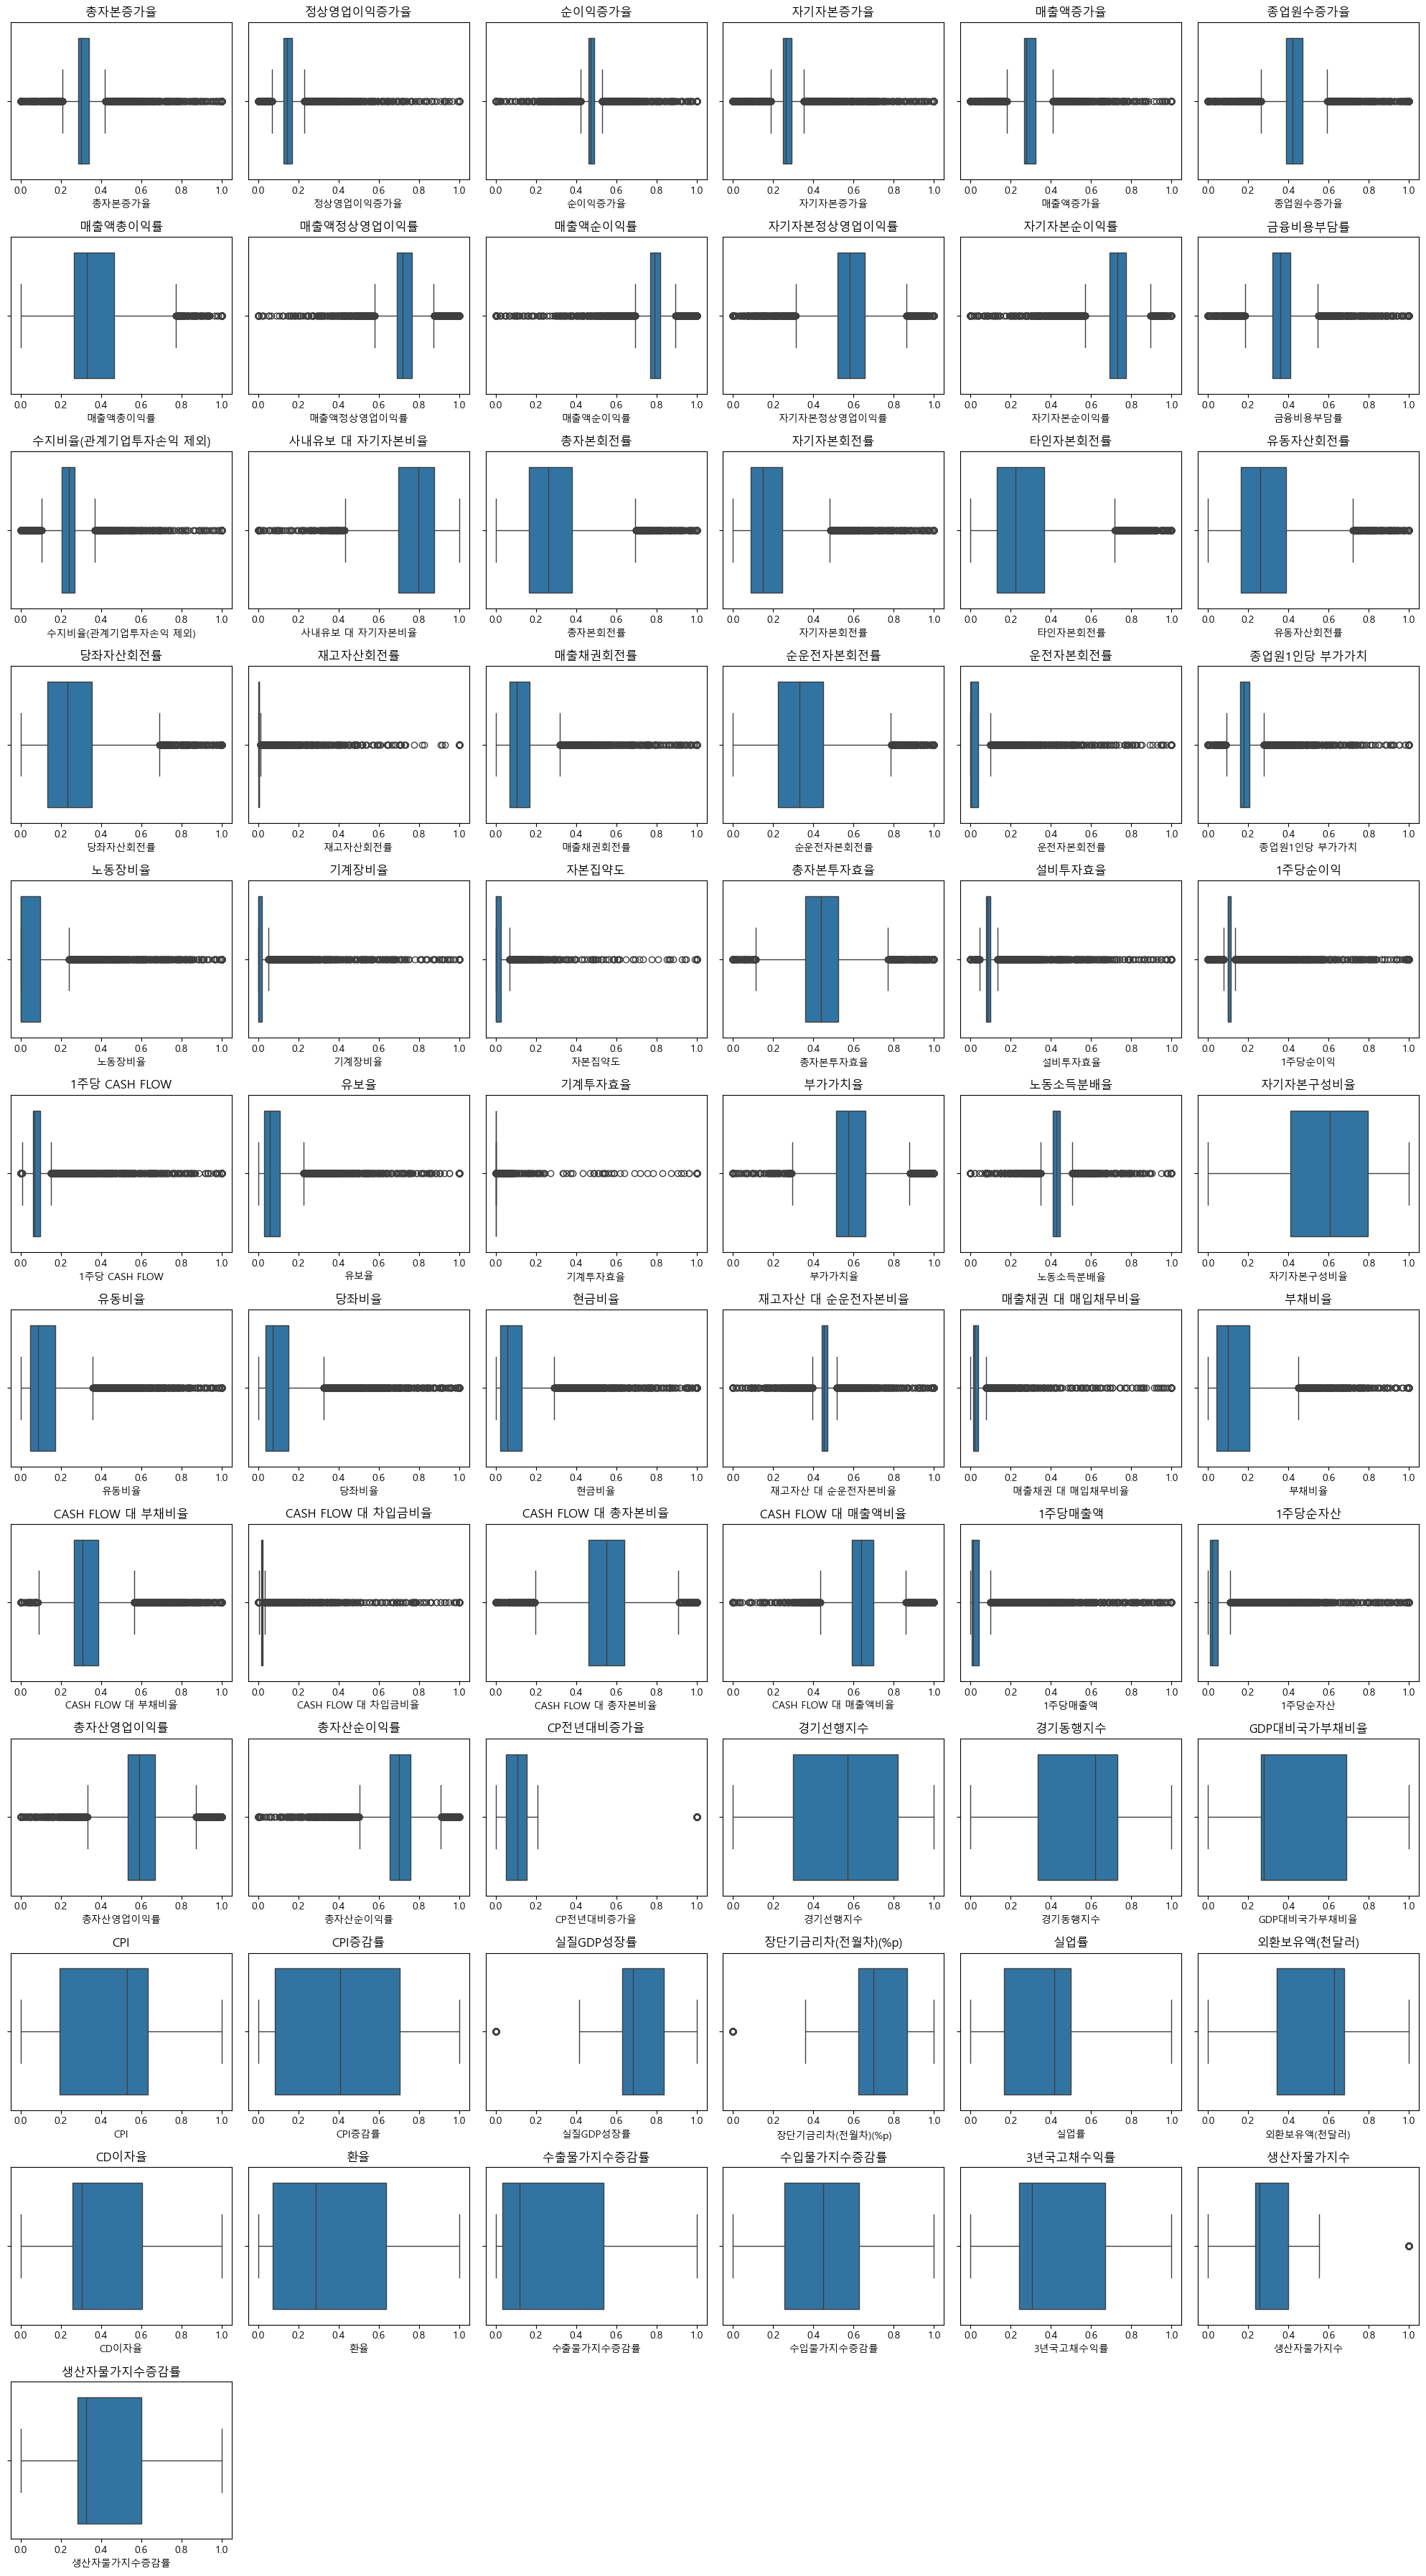

In [38]:
# 숫자형 데이터만 선택
numeric_cols = X_train_scaled.columns

# 서브플롯 생성
num_plots = len(numeric_cols)
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols  # num_plots를 num_cols로 나눈 후 올림
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3))

# 각 플롯에 박스플롯 그리기
for i, col in enumerate(numeric_cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(x=X_train_scaled[col], ax=ax)
    ax.set_title(col, rotation=0)  # 세로로 제목을 회전

# 빈 서브플롯 제거
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

# 서브플롯 간격 조정
plt.subplots_adjust(hspace=0.1)  # 서브플롯 간의 세로 간격 설정

plt.tight_layout()
plt.show()


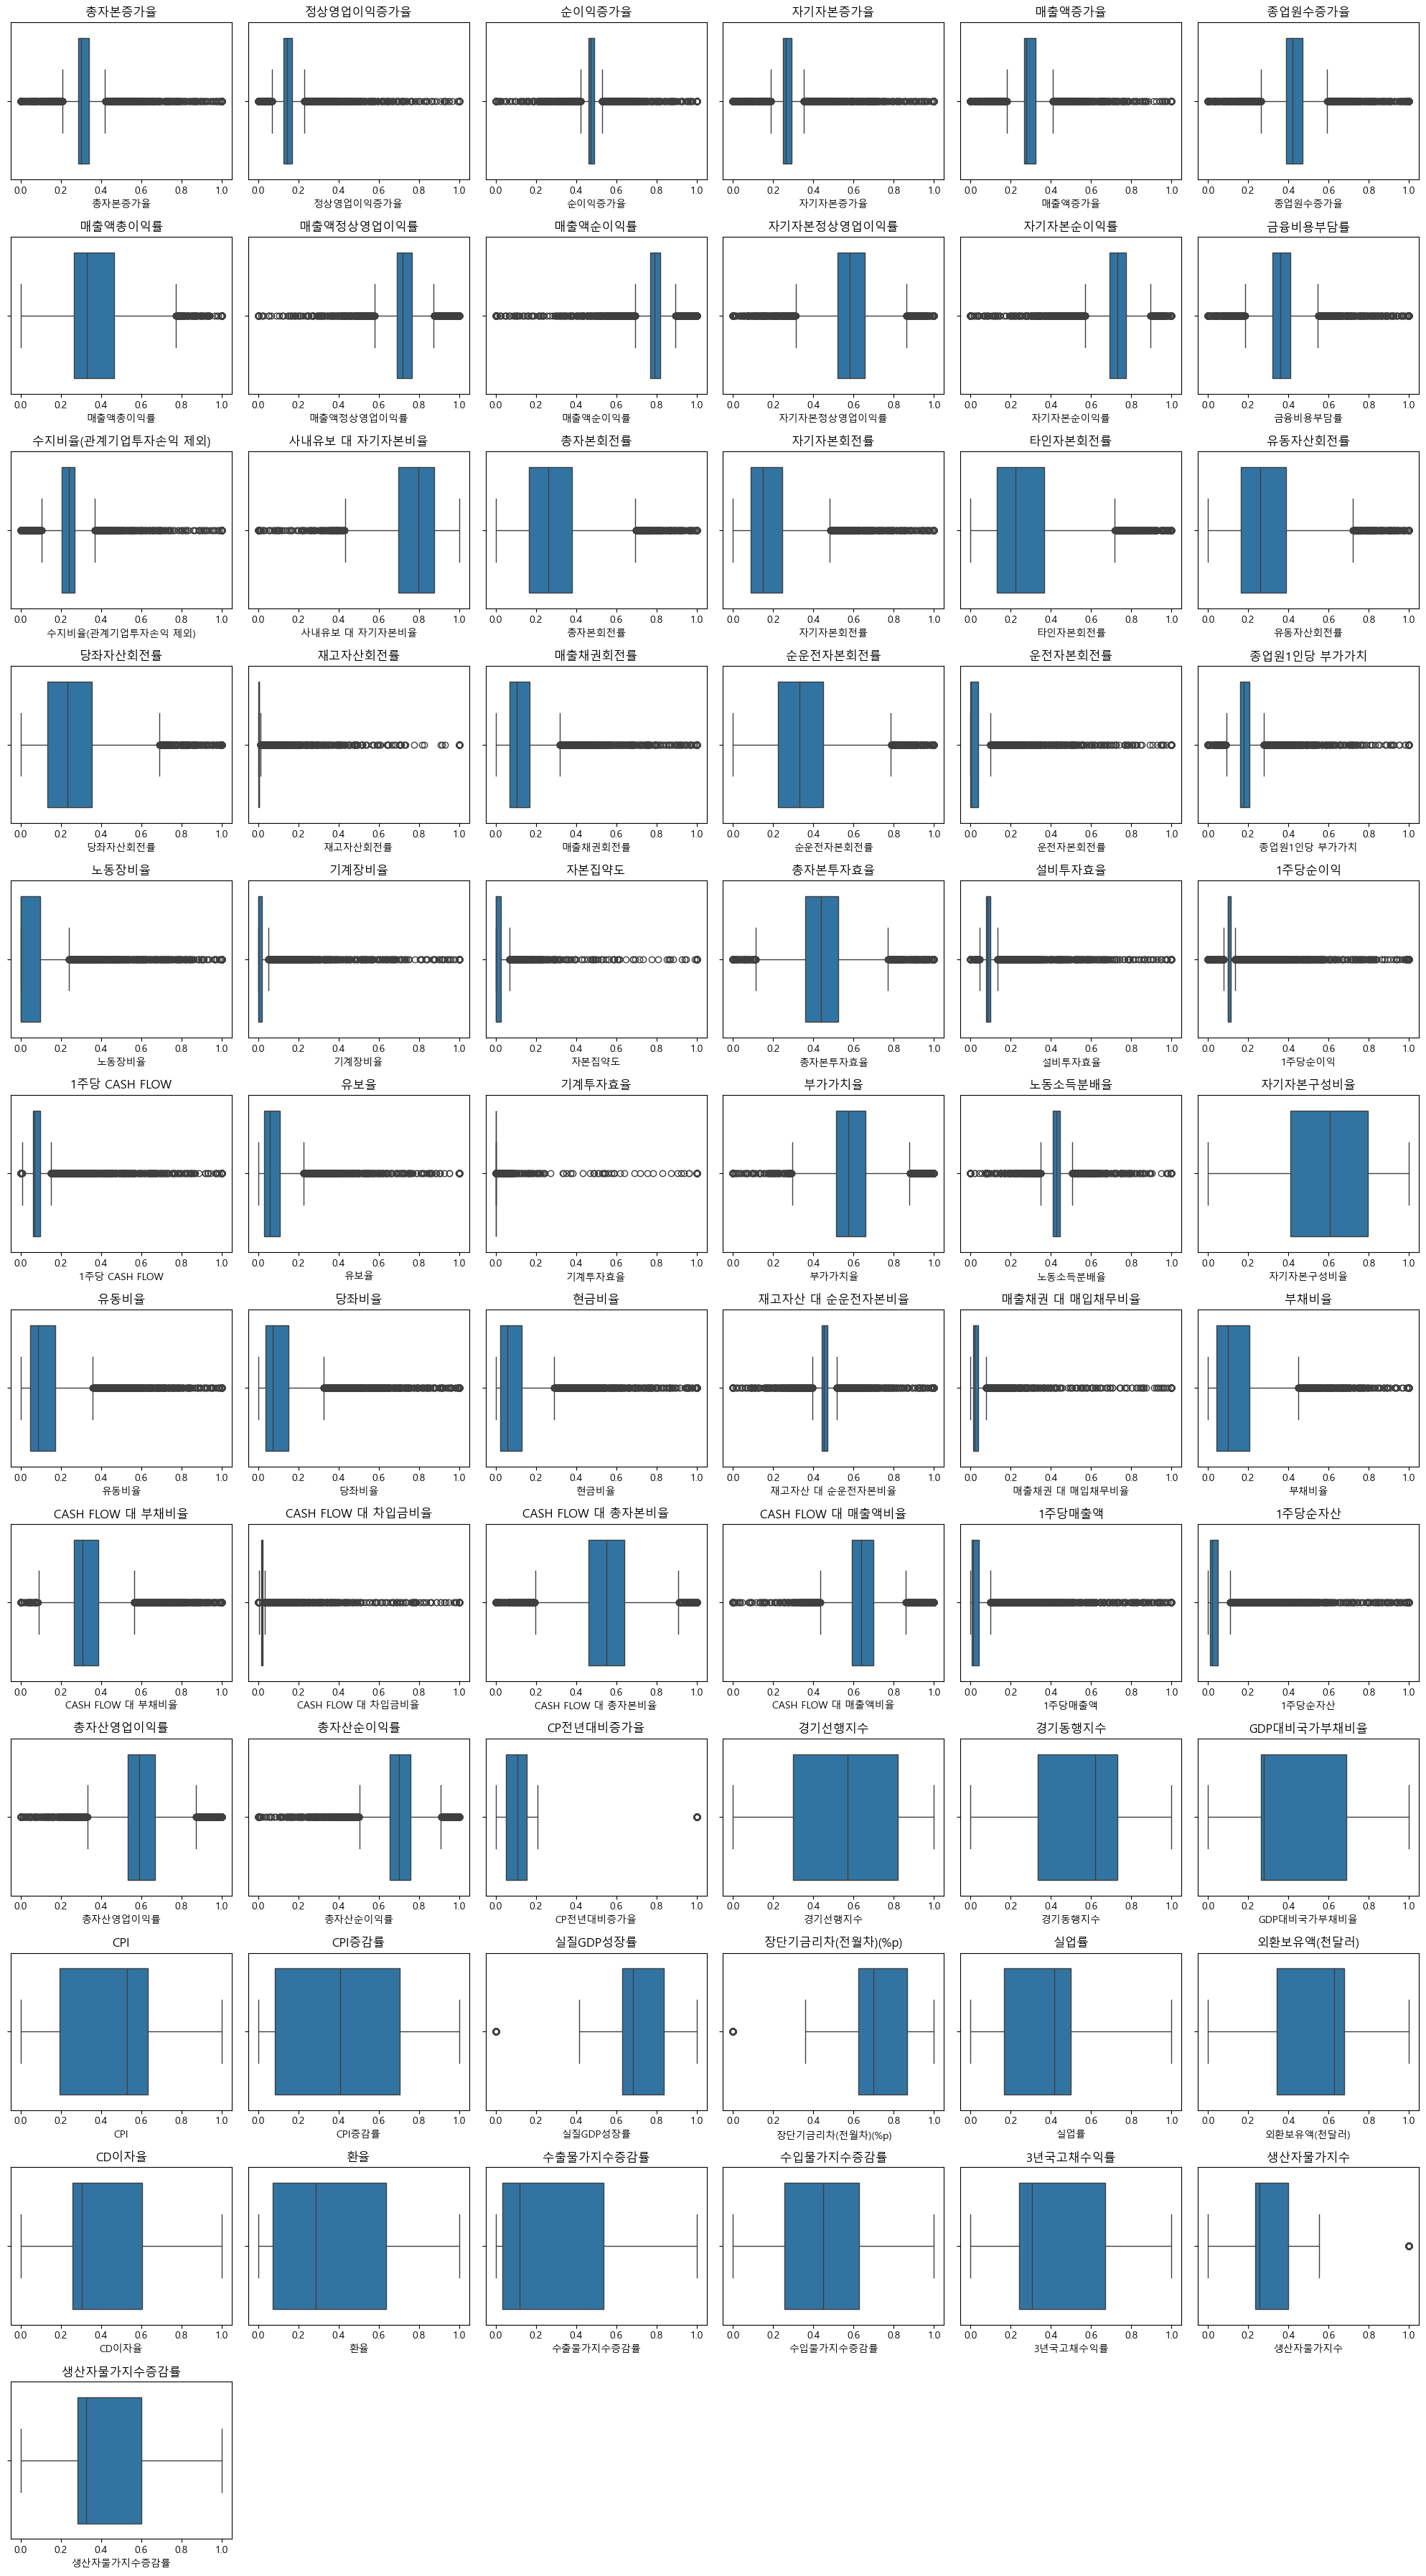

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 예시 데이터 생성 (X_train이 이미 정의되어 있다고 가정합니다)
# X_train = pd.DataFrame({
#     'feature1': [1, 2, 3, 4, 5],
#     'feature2': [10, 20, 30, 40, 50],
#     'feature3': [100, 200, 300, 400, 500]
# })

# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# 숫자형 데이터만 선택
numeric_cols = X_train_scaled.columns

# 서브플롯 생성
num_plots = len(numeric_cols)
num_cols = 6
num_rows = (num_plots + num_cols - 1) // num_cols  # num_plots를 num_cols로 나눈 후 올림
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3))

# 각 플롯에 박스플롯 그리기
for i, col in enumerate(numeric_cols):
    ax = axes[i // num_cols, i % num_cols]
    sns.boxplot(x=X_train_scaled[col], ax=ax)
    ax.set_title(col, rotation=0)  # 세로로 제목을 회전

# 빈 서브플롯 제거
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

# 서브플롯 간격 조정
plt.subplots_adjust(hspace=0.5)  # 서브플롯 간의 세로 간격 설정

plt.tight_layout()
plt.show()